# Transfer Function

Here’s a **Julia example** that demonstrates how to compute the output of a system given a sinusoidal input and the system's frequency response. We'll use an **RC low-pass filter** as the system and plot the input and output signals.


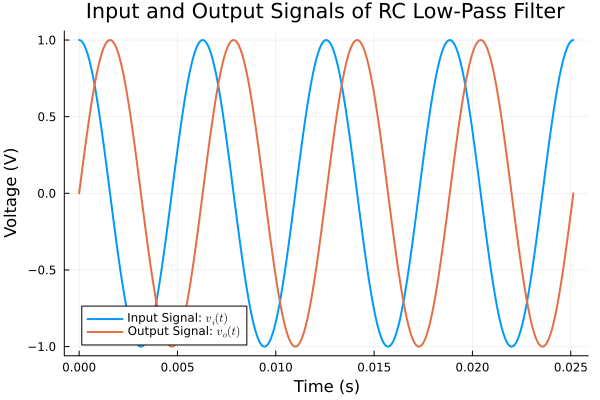

In [2]:
using Plots, LaTeXStrings

# im is also the imaginary unit in Julia
j = √(Complex(-1))
∠ = angle
| = abs

# Define the parameters of the RC low-pass filter
R = 1e3  # Resistance (1 kΩ)
C = 1e-6 # Capacitance (1 pF)
RC = R * C  # Time constant

# Define the input signal parameters
Aᵢ = 1.0       # Input amplitude (1 V)
θᵢ = 0.0       # Input phase (0 radians)
ω = 1e3         # Angular frequency (1000 rad/s)

# Define the frequency response of the RC low-pass filter
H(ω) = 1 / j * ω * RC 

# Compute the magnitude and phase of the frequency response
H_mag = |(H(ω))  # Magnitude of H(ω)
H_phase = ∠(H(ω))  # Phase of H(ω) in radians

# Compute the output signal parameters
Aₒ = Aᵢ * H_mag           # Output amplitude
θₒ = θᵢ + H_phase         # Output phase

# Define the time vector
t = range(0, stop=2π/ω*4, length=1000)  # 4 periods of the input signal

# Define the input and output signals
vᵢ(t) = Aᵢ * cos(ω * t + θᵢ)  # Input signal
vₒ(t) = Aₒ * cos(ω * t + θₒ)  # Output signal

# Plot the input and output signals
plot(t, vᵢ.(t), label="Input Signal: " * L"v_i(t)"
    , xlabel="Time (s)", ylabel="Voltage (V)"
    , title="Input and Output Signals of RC Low-Pass Filter"
    , linewidth=2
)
plot!(t, vₒ.(t), label="Output Signal: " * L"v_o(t)", linewidth=2)

### **Explanation of the Code**

1. **System Parameters**:
   - The RC low-pass filter is defined by its resistance $R$ and capacitance $C$.
   - The time constant $RC$ determines the cutoff frequency of the filter.

2. **Input Signal**:
   - The input signal is a cosine wave with amplitude $A_{\text{in}}$, frequency $\omega$, and phase $\theta_{\text{in}}$.

3. **Frequency Response**:
   - The frequency response $H(\omega)$ of the RC low-pass filter is computed as:
$H(\omega) = \frac{1}{1 + j\omega RC}$
   - The magnitude $|H(\omega)|$ and phase $\angle H(\omega)$ are extracted using `abs` and `angle`.

4. **Output Signal**:
   - The output signal is computed using the magnitude and phase of the frequency response:
$A_{\text{out}} = A_{\text{in}} \cdot |H(\omega)|$
$\theta_{\text{out}} = \theta_{\text{in}} + \angle H(\omega)$

5. **Plotting**:
   - The input and output signals are plotted over time to visualize how the system modifies the input.

---

### **Output Plot**
The plot will show:
- The **input signal** as a cosine wave.
- The **output signal** as a cosine wave with reduced amplitude and a phase shift, due to the RC low-pass filter.

---

### **Example Output**
For $R = 1 \, \text{k}\Omega$, $C = 1 \, \mu\text{F}$, and $\omega = 1000 \, \text{rad/s}$:
- The cutoff frequency of the filter is $f_c = \frac{1}{2\pi RC} \approx 159 \, \text{Hz}$.
- The output signal will have:
  - Reduced amplitude (since $\omega$ is near the cutoff frequency).
  - A phase shift (lag) introduced by the filter.
